In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/combined_data/cleaned_data_1.csv')

In [3]:
df.head()

,T,TM,Tm,H,PP,VV,V,VM,PM_2_5
0,23.4,30.3,19.0,59.0,0.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57.0,0.0,6.9,3.3,7.6,239.695455
2,24.0,31.8,16.9,51.0,0.0,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55.0,0.0,7.7,3.7,7.6,264.064286
4,23.1,30.6,17.4,46.0,0.0,6.9,3.3,5.4,223.208333


In [4]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [6]:
from sklearn.neighbors import KNeighborsRegressor

In [7]:
knn_reg = KNeighborsRegressor(n_neighbors=1)
knn_reg.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=1, p=2,
          weights='uniform')

In [8]:
f'Coefficient of determination R^2 on train set {knn_reg.score(X_train, y_train)}'
# must be close to 1, 1 is perfect fit

'Coefficient of determination R^2 on train set 1.0'

In [9]:
f'Coefficient of determination R^2 on test set {knn_reg.score(X_test, y_test)}'

'Coefficient of determination R^2 on test set 0.14860895190102552'

In [10]:
from sklearn.model_selection import cross_val_score
cvv_score = cross_val_score(knn_reg, X, y, cv = 3)

In [11]:
cvv_score.mean()

-0.09121259776941071

In [12]:
knn_pred = knn_reg.predict(X_test)

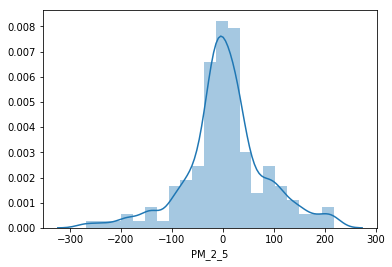

In [13]:
sns.distplot(y_test -knn_pred)

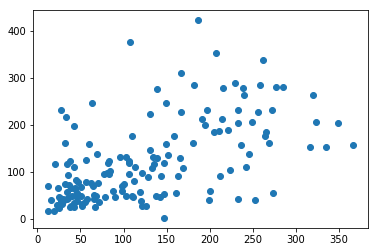

In [14]:
plt.scatter(y_test,knn_pred)

In [15]:
from sklearn import metrics
print(f"Mean Abs Error: {metrics.mean_absolute_error(y_test, knn_pred)}")
print(f"Mean Sq Error: {metrics.mean_squared_error(y_test, knn_pred)}")
print(f"Root Mean Error: {np.sqrt(metrics.mean_squared_error(y_test, knn_pred))}")

Mean Abs Error: 56.344983492979786
Mean Sq Error: 6420.93093747686
Root Mean Error: 80.13071157475677


# hyperparameter Tuning

In [16]:
scores = []
for i in range(1, 40):
    knn = KNeighborsRegressor(n_neighbors=i)
    score = cross_val_score(knn, X, y, cv=5, scoring="neg_mean_squared_error")
    scores.append(score.mean())

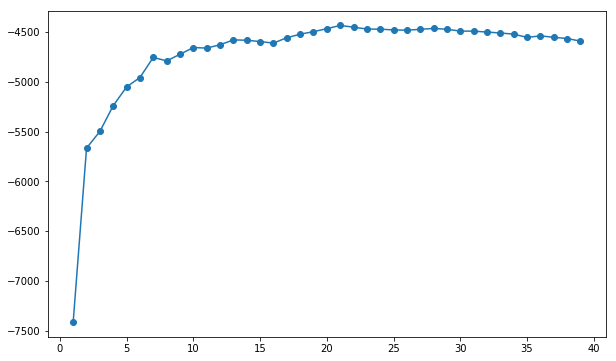

In [17]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 40), scores, marker='o')

In [18]:
knn = KNeighborsRegressor(n_neighbors=8)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=8, p=2,
          weights='uniform')

In [20]:
cross_val_score(knn, X, y, cv = 5).mean()


0.20577135855349224

In [21]:
tune_pred = knn.predict(X_test)


In [22]:
tune_pred

array([ 44.93772645, 157.35389493,  44.16324943,  55.63020833,
        42.34090909, 169.77717391,  99.21875   ,  88.05751812,
        70.94196429, 195.55699405,  75.79166667, 171.67366071,
       233.67850379,  91.890625  ,  58.88020833, 231.75520833,
        98.3452381 ,  80.23958333, 236.19134964,  82.4140958 ,
       150.29084821,  51.140625  ,  93.88817935, 229.95975379,
       124.55210598, 108.88541667, 206.66666667, 251.01183712,
        85.91694079, 198.16220238, 152.59895833,  75.63727679,
        91.15652412,  53.26889822,  52.47334559, 167.92443182,
       215.515625  ,  82.44316123, 120.64557327,  63.18119518,
       192.40885417, 137.375     , 125.47751597,  80.20833333,
       152.59895833, 100.265625  ,  76.48929758,  75.37166986,
       206.38020833, 227.00837862, 175.95946558, 146.83740942,
        81.82291667, 141.78020833,  99.08881579, 289.30984437,
        52.8984375 , 103.93541667,  67.8296131 , 221.28917572,
        92.73092888,  54.65625   ,  48.48278986, 218.94

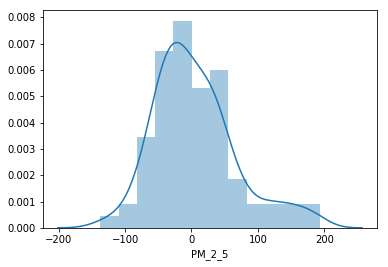

In [23]:
sns.distplot(y_test-tune_pred)

In [24]:
from sklearn import metrics
print(f"Mean Abs Error: {metrics.mean_absolute_error(y_test, tune_pred)}")
print(f"Mean Sq Error: {metrics.mean_squared_error(y_test, tune_pred)}")
print(f"Root Mean Error: {np.sqrt(metrics.mean_squared_error(y_test, tune_pred))}")

Mean Abs Error: 47.473539420572436
Mean Sq Error: 3896.1876694781954
Root Mean Error: 62.41944944869504


In [25]:
import pickle
pickle.dump(knn, open('knn.pkl', 'wb'))